In [24]:
#CERES-EBAF Data - Code to read in data, plot global maps of top of atmosphere radiation and energy balance
#Jennifer Kay (Jennifer.E.Kay@colorado.edu University of Colorado)
#My name is Renato and Dr. Kay passed me this code to add more modifications
#Last updated: June 19, 2021

%matplotlib inline
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import xarray as xr

In [2]:
## open the CERES-EBAF dataset using xarray
ds = xr.open_dataset("CERES_EBAF-TOA_Ed4.1_Subset_200003-202102.nc")
ds   ## when you type "ds" - it prints information about the file to the screen.  

<xarray.Dataset>
Dimensions:            (lat: 180, lon: 360, time: 252)
Coordinates:
  * lon                (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat                (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time               (time) datetime64[ns] 2000-03-15 ... 2021-02-15
Data variables:
    toa_sw_all_mon     (time, lat, lon) float32 ...
    toa_lw_all_mon     (time, lat, lon) float32 ...
    toa_net_all_mon    (time, lat, lon) float32 ...
    toa_sw_clr_c_mon   (time, lat, lon) float32 ...
    toa_lw_clr_c_mon   (time, lat, lon) float32 ...
    toa_net_clr_c_mon  (time, lat, lon) float32 ...
    solar_mon          (time, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

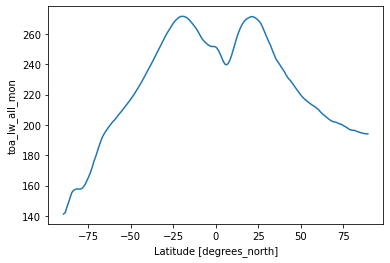

In [3]:
#This calculates the zonal mean for outgoing longwave radiation
OLR=ds.toa_lw_all_mon.mean('time').mean('lon')
OLR.shape
OLR.plot()

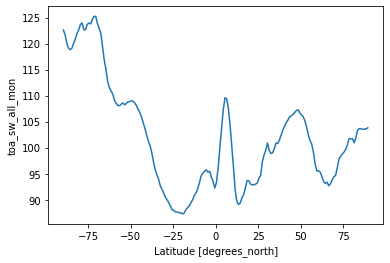

In [4]:
#This calculates the zonal mean for absorbed shortwave radiation
OSR=ds.toa_sw_all_mon.mean('time').mean('lon')
OSR.shape
OSR.plot()

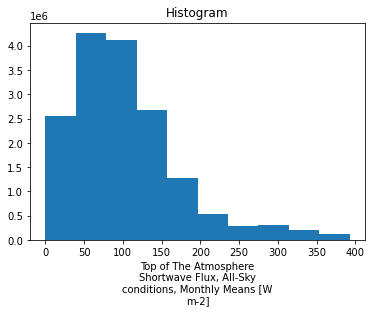

In [5]:
##Use xarray’s hooks to matplotlib to create some quick plots -- not final but helpful
## histograms...
ds.toa_sw_all_mon.plot();

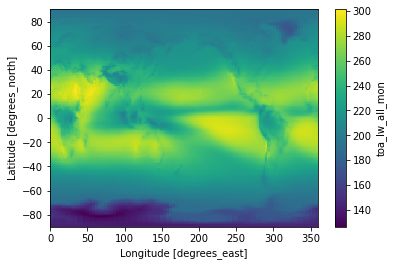

In [6]:
## maps...
ds.toa_lw_all_mon.mean('time').plot();
#ds.toa_sw_all_mon.sel(time='2000-03-15').plot();
#ds.toa_lw_all_mon.sel(time=slice('2007-06-15','2007-07-15')).mean('time').plot();

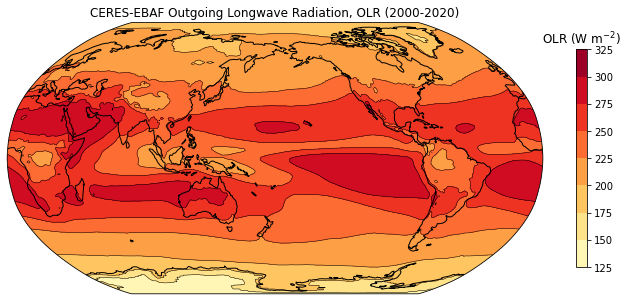

In [7]:
## Now let's make a projected global map plot using cartopy

### set up global map using cartopy
field, lon = add_cyclic_point(ds.toa_lw_all_mon.mean('time'), coord=ds.lon)
lat = ds.lat
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

# add filled contours
cf = ax.contourf(lon, lat, field, cmap='YlOrRd', transform=ccrs.PlateCarree());
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()
# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('OLR (W m$^{-2}$)')
# add title
ax.set_title('CERES-EBAF Outgoing Longwave Radiation, OLR (2000-2020)');

126.31296
301.22748


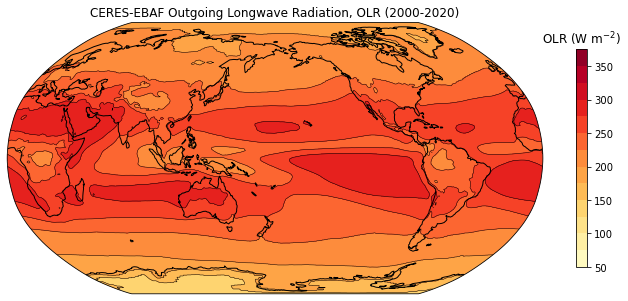

In [8]:
### OK, now we are ready to make plots of the top of atmosphere fluxes!!
### We'll start with outgoing longwave radiation.
### Note: this plot is exactly as above but now we define OLR and specify the levels to plot

OLR=ds.toa_lw_all_mon.mean('time') ### sign convention, positive up.  outgoing longwave radiation

print(np.min(OLR.values))
print(np.max(OLR.values))

levels = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]
#levels = [120, 150, 180, 210, 250, 280, 310, 340]

### set up global map using cartopy
field, lon = add_cyclic_point(OLR, coord=ds.lon)
lat = ds.lat
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

# add filled contours
cf = ax.contourf(lon, lat, field, levels=levels, cmap='YlOrRd', transform=ccrs.PlateCarree());
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', levels=levels, linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()
# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('OLR (W m$^{-2}$)')
# add title
ax.set_title('CERES-EBAF Outgoing Longwave Radiation, OLR (2000-2020)');

plt.savefig('CERESEBAF_OLR_2000-2020.png', bbox_inches='tight')

49.313576
362.64832


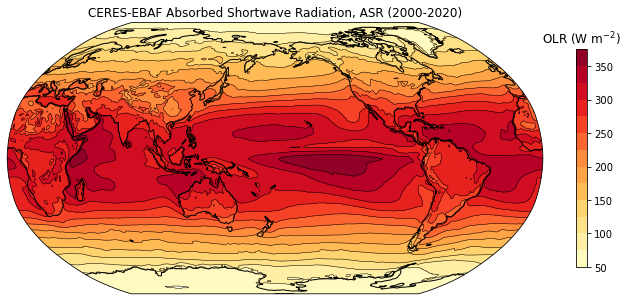

In [9]:
## As in above, but now we calculate and then plot absorbed shortwave radiation

### Calculate absorbed shortwave radiation
OSR=ds.toa_sw_all_mon.mean('time') ### outgoing solar radiation, measured by CERES
SOLIN=ds.solar_mon.mean('time')    ### incoming solar radiation, from the sun
ASR=SOLIN-OSR  ### sign convention, positive down.  incoming solar radiation minus outgoing solar radiation

print(np.min(ASR.values))
print(np.max(ASR.values))

levels = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]

### set up global map using cartopy
field, lon = add_cyclic_point(ASR, coord=ds.lon)
lat = ds.lat
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

# add filled contours
cf = ax.contourf(lon, lat, field, levels=levels, cmap='YlOrRd', transform=ccrs.PlateCarree());
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', levels=levels, linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()
# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('OLR (W m$^{-2}$)')
# add title
ax.set_title('CERES-EBAF Absorbed Shortwave Radiation, ASR (2000-2020)');

plt.savefig('CERESEBAF_ASR_2000-2020.png', bbox_inches='tight')

-128.17973
100.082214


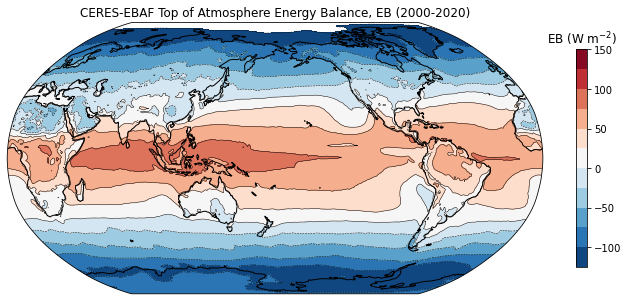

In [10]:
## As in above, but now we calculate and then plot the top of atmosphere energy balance

### Calculate top of atmosphere energy imbalance (NetSW+NetLW)
netLW=-OLR                  ### Note that we are taking -OLR so that the sign convention is all positive down
netSW=ASR
netTOAimbalance=netSW+netLW ### sign convention positive down

print(np.min(netTOAimbalance.values))
print(np.max(netTOAimbalance.values))

levels = [-125, -100, -75, -50, -25, 0, 25, 50, 75, 100, 125, 150]

### set up global map using cartopy
field, lon = add_cyclic_point(netTOAimbalance, coord=ds.lon)
lat = ds.lat
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

# add filled contours
cf = ax.contourf(lon, lat, field, levels=levels, cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree());
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', levels=levels, linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()
# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('EB (W m$^{-2}$)')
# add title
ax.set_title('CERES-EBAF Top of Atmosphere Energy Balance, EB (2000-2020)');

plt.savefig('CERESEBAF_EB_2000-2020.png', bbox_inches='tight')

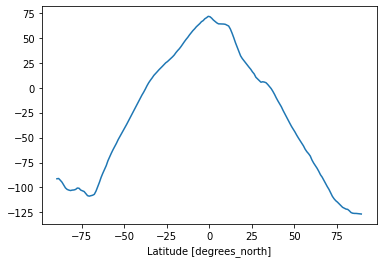

In [11]:
NR=netTOAimbalance.mean('lon')
NR.shape
NR.plot()

In [12]:
#cos_lat is the weighted data, with lat being the latitude values
cos_lat=np.cos(lat*np.pi/180)
#print(cos_lat)
#print(lat)

In [13]:
#Calculates net global mean
Zmean=netTOAimbalance.mean('lon')
global_mean=(Zmean*cos_lat).sum('lat')/np.nansum(cos_lat)
print(global_mean.values)
print(np.round(global_mean.values,2))
print('Global TOA imbalance (W/m\u00b2)',np.round(global_mean.values,2))

0.9907416
0.99
Global TOA imbalance (W/m²) 0.99


In [23]:
#Attempting to plot global mean
Zmean.shape
#Global_mean_monthly=(Zmean*cos_lat).sum('lat')/np.nansum(cos_lat)
#Global_mean_monthly.plot()

(180,)

In [15]:
#Gets the monthly mean for the longwave radiation
LWmean_monthly=ds.toa_lw_all_mon.mean('lon')
LWmean_monthly.shape

(252, 180)

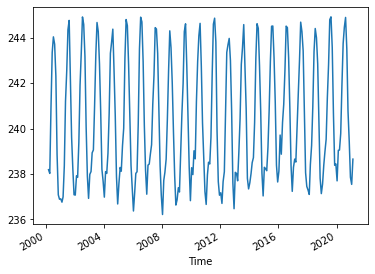

In [16]:
#Plots the monthly mean for LW
LWZ_mean_monthly=(LWmean_monthly*cos_lat).sum('lat')/np.nansum(cos_lat)
LWZ_mean_monthly.plot()

In [17]:
#Gets the monthly mean for the shortwave radiation
SWmean_monthly=ds.toa_sw_all_mon.mean('lon')
SWmean_monthly.shape

(252, 180)

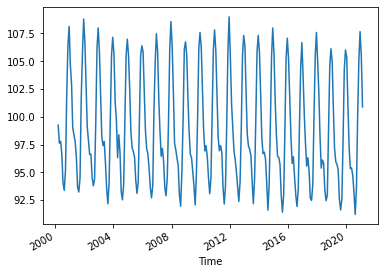

In [18]:
#Plots the monthly mean for SW
SWZ_mean_monthly=(SWmean_monthly*cos_lat).sum('lat')/np.nansum(cos_lat)
SWZ_mean_monthly.plot()

In [19]:
#Trying to calculate incoming shortwave(SW) mean
SWmean=netSW.mean('lon')
SW_mean=(SWmean*cos_lat).sum('lat')/np.nansum(cos_lat)
print(SW_mean.values)
print(np.round(SW_mean.values,2))
print('Average incoming Shortwave Radiation (W/m\u00b2)',np.round(SW_mean.values,2))


241.32948
241.33
Average incoming Shortwave Radiation (W/m²) 241.33


In [21]:
#Trying to calculate incoming longwave(LW) mean
LWmean=OLR.mean('lon')
LW_mean=(LWmean*cos_lat).sum('lat')/np.nansum(cos_lat)
print(LW_mean.values)
print(np.round(LW_mean.values,2))
print('Average outgoing Longwave Radiation (W/m\u00b2)',np.round(LW_mean.values,2))


240.33875
240.34
Average outgoing Longwave Radiation (W/m²) 240.34
